__Step 1: Data Preparation__

In [14]:
# Sample dataset (customer reviews)
customer_reviews = [
    "The product exceeded my expectations. It's fantastic!",
    "Not recommended. The product quality is poor.",
    "Amazing service. Will definitely buy again.",
    "Disappointing experience. The product did not meet my needs.",
    "Really good product.",
    "Very Disappointing Product. Strongly not recommend"
]

__Step 2: Text Preprocessing__

In [15]:
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def preprocess_text(review):
    review = review.lower()
    review = ''.join([c for c in review if c not in string.punctuation and not c.isdigit()])
    words = review.split()
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]
    return ' '.join(words)

# Preprocess the reviews
preprocessed_reviews = [preprocess_text(review) for review in customer_reviews]


__Step 3: Feature Extraction using TF-IDF__

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed reviews
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_reviews)


__Step 4: Topic Modeling with LDA__

In [18]:
from sklearn.decomposition import LatentDirichletAllocation

# Initialize LDA model
num_topics = 5  # Let's choose 5 topics
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)

# Fit the LDA model
lda_model.fit(tfidf_matrix)


LatentDirichletAllocation(n_components=5, random_state=42)

__Step 5: Interpretation of Topics__

In [19]:
# Function to display topics and top words
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))
        print()

# Define the number of top words to display for each topic
num_top_words = 5

# Display the topics
print("Topics and Top Words:")
display_topics(lda_model, tfidf_vectorizer.get_feature_names_out(), num_top_words)


Topics and Top Words:
Topic 1:
fantastic expectations exceeded product disappointing

Topic 2:
good really product disappointing recommended

Topic 3:
amazing buy definitely service product

Topic 4:
recommended quality poor product did

Topic 5:
strongly recommend disappointing product recommended



__Visualization : Word Clouds for Each Topic__

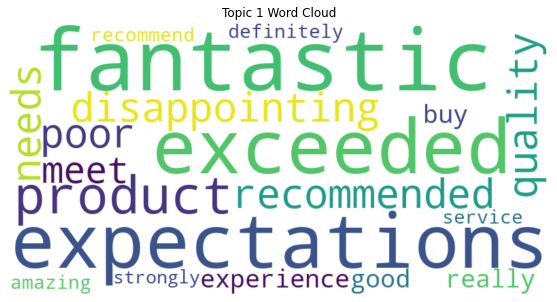

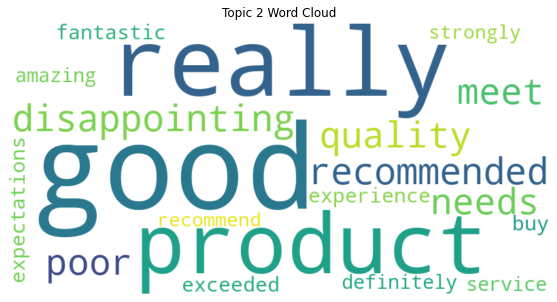

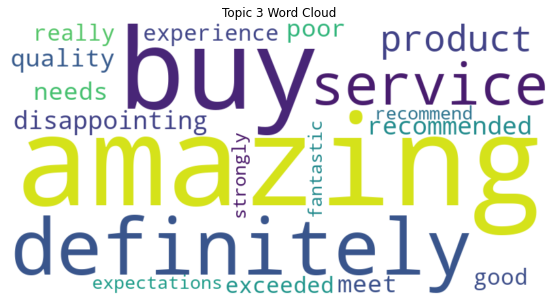

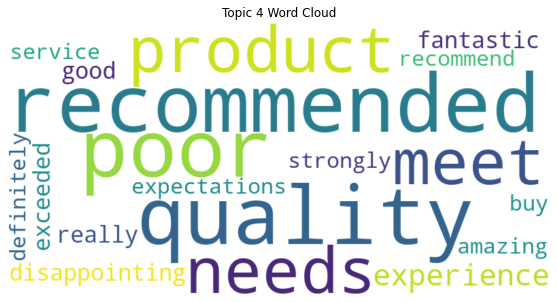

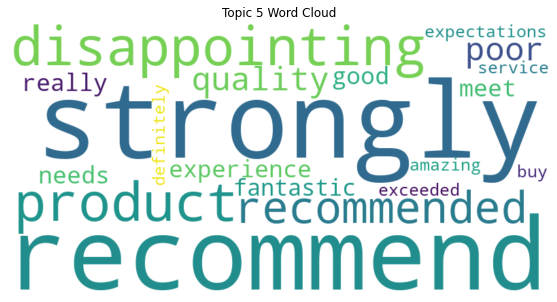

In [20]:
from wordcloud import WordCloud

# Function to display word clouds for each topic
def display_word_clouds(lda_model, feature_names, num_words):
    for topic_idx, topic in enumerate(lda_model.components_):
        # Get the top words for the topic
        top_words = [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(top_words))
        
        # Plot the word cloud for the topic
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Topic {topic_idx + 1} Word Cloud')
        plt.show()

# Define the number of top words for word clouds
num_words_for_wordcloud = 20

# Display word clouds for each topic
display_word_clouds(lda_model, tfidf_vectorizer.get_feature_names_out(), num_words_for_wordcloud)


__Visualisation: Bar Chart__

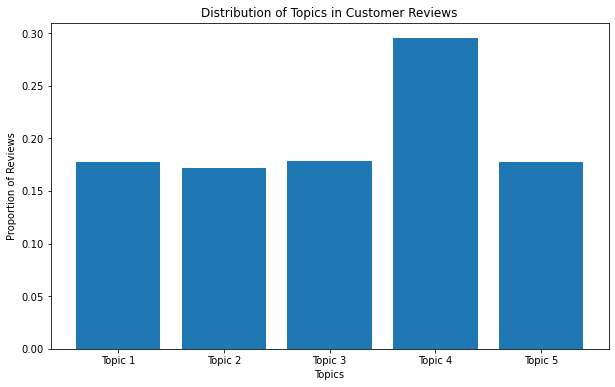

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot topic distribution
def plot_topic_distribution(lda_model, tfidf_matrix):
    topic_distribution = lda_model.transform(tfidf_matrix)
    topic_proportions = topic_distribution.sum(axis=0) / topic_distribution.sum()
    topics = [f'Topic {i+1}' for i in range(len(topic_proportions))]
    
    plt.figure(figsize=(10, 6))
    plt.bar(topics, topic_proportions)
    plt.xlabel('Topics')
    plt.ylabel('Proportion of Reviews')
    plt.title('Distribution of Topics in Customer Reviews')
    plt.show()

# Plot the topic distribution
plot_topic_distribution(lda_model, tfidf_matrix)
